In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Clickstream-customer conversion/train_data.csv")

In [4]:
df

,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,2008,7,4,3,29,17622,4,P19,2,1,1,48,1,2
132375,2008,6,19,9,29,15165,3,C26,14,3,1,28,2,2
132376,2008,7,15,4,29,19359,1,A4,3,2,2,38,2,1
132377,2008,7,28,16,29,21454,3,C50,9,5,2,20,2,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132379 entries, 0 to 132378
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   year                  132379 non-null  int64 
 1   month                 132379 non-null  int64 
 2   day                   132379 non-null  int64 
 3   order                 132379 non-null  int64 
 4   country               132379 non-null  int64 
 5   session_id            132379 non-null  int64 
 6   page1_main_category   132379 non-null  int64 
 7   page2_clothing_model  132379 non-null  object
 8   colour                132379 non-null  int64 
 9   location              132379 non-null  int64 
 10  model_photography     132379 non-null  int64 
 11  price                 132379 non-null  int64 
 12  price_2               132379 non-null  int64 
 13  page                  132379 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 14.1+ MB


In [6]:
for i in df.columns:
    print(i,":",df[i].nunique())

year : 1
month : 5
day : 31
order : 193
country : 46
session_id : 22910
page1_main_category : 4
page2_clothing_model : 216
colour : 14
location : 6
model_photography : 2
price : 20
price_2 : 2
page : 5


In [7]:
for i in df.columns:
    print(i,":",df[i].unique())
    print()
    print("-----------------------------------------------------")

year : [2008]

-----------------------------------------------------
month : [6 5 7 8 4]

-----------------------------------------------------
day : [22 19 15  2  9  8 16  5  1 11  7  4 17 21 28 13 25 31 29 27  3 10 18 23
 14  6 24 26 20 30 12]

-----------------------------------------------------
order : [ 21   6   2  16   1  11   3  18  13   4  14   5   9  10  32  24  46  30
  17  12  25  27   7  40  29  59   8  41  20  36  92  22  66  38  60  26
  23  84  45  19  35  52  61  15  37  49  63  33 101  43  34  80 121  79
  31  39  28  47  55  54  53  42 114  62 154  44  78  58  99  50  70  56
 104  57  65  48 105 125  75 133  74  67  96 116 134  82  68  90 111  51
  85  76  83  86  73  72 118  77 103 124  95  91  94  64 175  81 179 113
 109  71  69  87  88 183  89 106 100 110 135 153 117 155 102 138 159 151
  98 166 107 128 191 131 177 139 146 120 129 187 136 130 149 162 144  93
 182 169  97 119 142 150 189 176 145 115 127 160 122 178 108 141 112 126
 158 161 132 168 156 185 173 167 1

In [8]:
df.isnull().sum()

,0
year,0
month,0
day,0
order,0
country,0
session_id,0
page1_main_category,0
page2_clothing_model,0
colour,0
location,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,132379.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
month,132379.0,5.582759,1.328064,4.0,4.0,5.0,7.0,8.0
day,132379.0,14.507671,8.829106,1.0,7.0,14.0,22.0,31.0
order,132379.0,9.811314,13.458937,1.0,2.0,6.0,12.0,195.0
country,132379.0,26.949629,7.153071,1.0,29.0,29.0,29.0,47.0
session_id,132379.0,12038.722063,7012.460866,1.0,5905.0,11931.0,18212.0,24026.0
page1_main_category,132379.0,2.400426,1.145004,1.0,1.0,2.0,3.0,4.0
colour,132379.0,6.227393,4.238354,1.0,3.0,4.0,9.0,14.0
location,132379.0,3.261106,1.714058,1.0,2.0,3.0,5.0,6.0
model_photography,132379.0,1.260026,0.438650,1.0,1.0,1.0,2.0,2.0


In [11]:
# Drop irrelevant columns
df = df.drop(columns=['year', 'session_id'])

In [12]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,6,22,21,29,3,C20,13,1,2,48,1,2
1,5,19,6,29,2,B26,13,3,1,57,1,2
2,7,15,2,29,3,C13,9,5,1,48,1,1
3,5,2,2,29,2,B11,2,4,1,43,2,1
4,6,9,16,29,2,B31,9,5,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2
132375,6,19,9,29,3,C26,14,3,1,28,2,2
132376,7,15,4,29,1,A4,3,2,2,38,2,1
132377,7,28,16,29,3,C50,9,5,2,20,2,3


In [13]:
# Define the mapping from country codes to continent names
continent_map = {
    1: "Oceania", 2: "Europe", 3: "Europe", 4: "Europe", 5: "Caribbean",
    6: "Oceania", 7: "Europe", 8: "Europe", 9: "Europe", 10: "Europe",
    11: "Europe", 12: "Unknown", 13: "Europe", 14: "Europe", 15: "Europe",
    16: "Europe", 17: "Europe", 18: "Europe", 19: "Europe", 20: "Asia",
    21: "Europe", 22: "Europe", 23: "Europe", 24: "Europe", 25: "Europe",
    26: "North America", 27: "Europe", 28: "Europe", 29: "Europe", 30: "Europe",
    31: "Europe", 32: "Europe", 33: "Europe", 34: "Europe", 35: "Europe",
    36: "Europe", 37: "Europe", 38: "Europe", 39: "Europe", 40: "Asia",
    41: "Europe", 42: "North America", 43: "Unknown", 44: "Unknown",
    45: "Unknown", 46: "Unknown", 47: "Unknown"
}

# Map the country codes to continents
df['continent'] = df['country'].map(continent_map).fillna('Unknown')

# 1. Interactive Bar Chart: Session Count per Continent
fig1 = px.bar(df['continent'].value_counts().reset_index(),
              x='continent', y='count',
              labels={'continent': 'Continent', 'count': 'Number of Sessions'},
              title='📊 Session Count per Continent',
              color='continent',
              template='plotly_white')
fig1.show()

In [14]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe


In [15]:
df["continent"].unique()

array(['Europe', 'Unknown', 'North America', 'Asia', 'Caribbean',
       'Oceania'], dtype=object)

In [16]:
df["page2_clothing_model"].value_counts().reset_index()

,page2_clothing_model,count
0,B4,2824
1,A2,2389
2,A11,2247
3,P1,2134
4,B10,2011
...,...,...
211,P31,64
212,P66,42
213,P79,2
214,P22,2


In [17]:
# 1. Interactive Bar Chart: Session Count per Continent
fig1 = px.bar(df['page2_clothing_model'].value_counts().reset_index(),
              x='page2_clothing_model', y='count',
              labels={'count': 'model_count'},
              color='page2_clothing_model')
fig1.show()

In [18]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe


In [19]:
# Define mapping dictionary
category_map = {
    1: 'trousers',
    2: 'skirts',
    3: 'blouses',
    4: 'sale'
}

# Create new column using the mapping
df['page_1'] = df['page1_main_category'].map(category_map)


In [20]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent,page_1
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe,blouses
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe,skirts
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe,blouses
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe,skirts
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe,skirts
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe,sale
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe,blouses
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe,trousers
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe,blouses


In [21]:
# Create the pie chart

# Count values for each category
category_counts = df['page_1'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

fig = px.pie(category_counts,
             names='category',
             values='count',
             title='🛍️ Distribution of Product Categories (Page 1)',
             template='plotly_white',
             color_discrete_sequence=px.colors.qualitative.Set2,
             hole=0.4)  # donut style

# Add percentages and labels
fig.update_traces(textinfo='percent+label')

# Show the plot
fig.show()

In [22]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)
  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

In [23]:
df.columns

Index(['month', 'day', 'order', 'country', 'page1_main_category',
       'page2_clothing_model', 'colour', 'location', 'model_photography',
       'price', 'price_2', 'page', 'continent', 'page_1'],
      dtype='object')

In [24]:
df_2 = df.drop(columns=["page2_clothing_model", "continent", "page_1"])

In [25]:
df_2

,month,day,order,country,page1_main_category,colour,location,model_photography,price,price_2,page
0,6,22,21,29,3,13,1,2,48,1,2
1,5,19,6,29,2,13,3,1,57,1,2
2,7,15,2,29,3,9,5,1,48,1,1
3,5,2,2,29,2,2,4,1,43,2,1
4,6,9,16,29,2,9,5,1,57,1,2
...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,2,1,1,48,1,2
132375,6,19,9,29,3,14,3,1,28,2,2
132376,7,15,4,29,1,3,2,2,38,2,1
132377,7,28,16,29,3,9,5,2,20,2,3


<ipython-input-22-b91d4c0a5496>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b91d4c0a5496>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-b91d4c0a5496>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

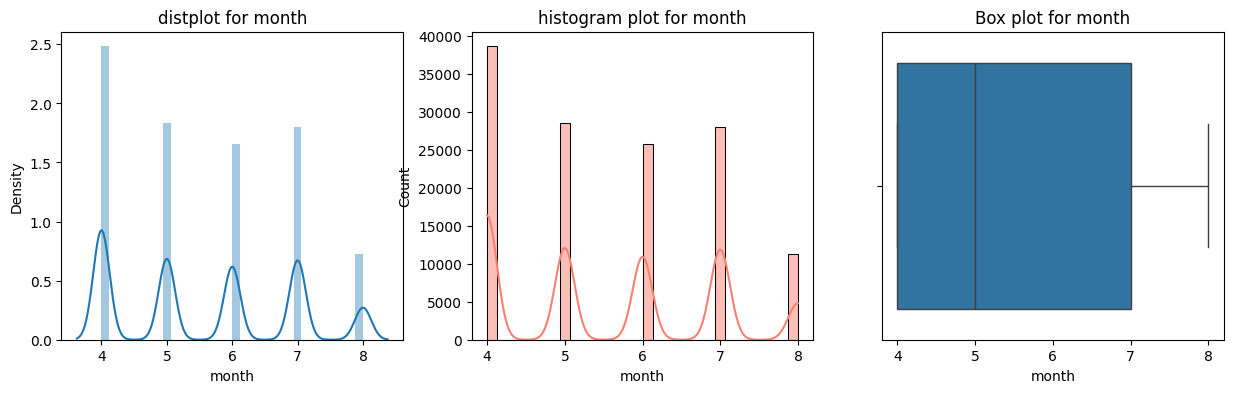

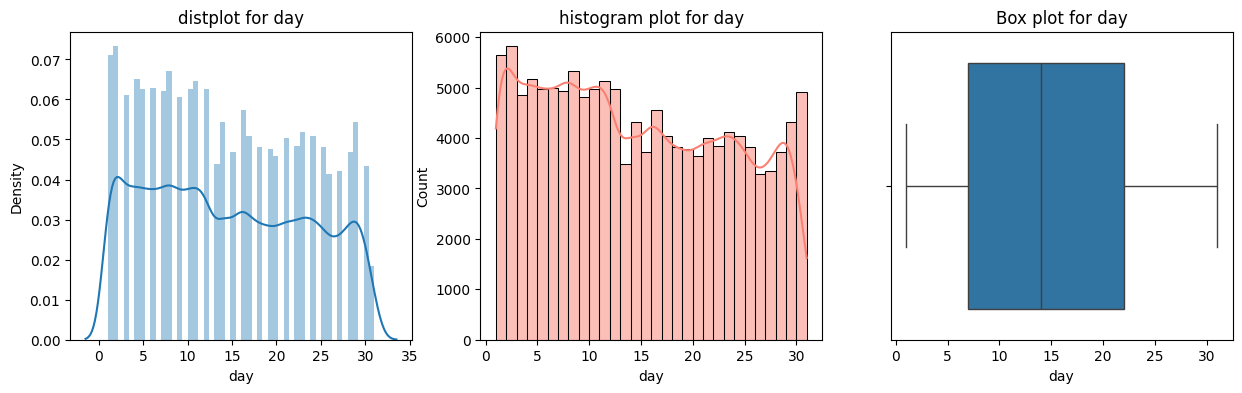

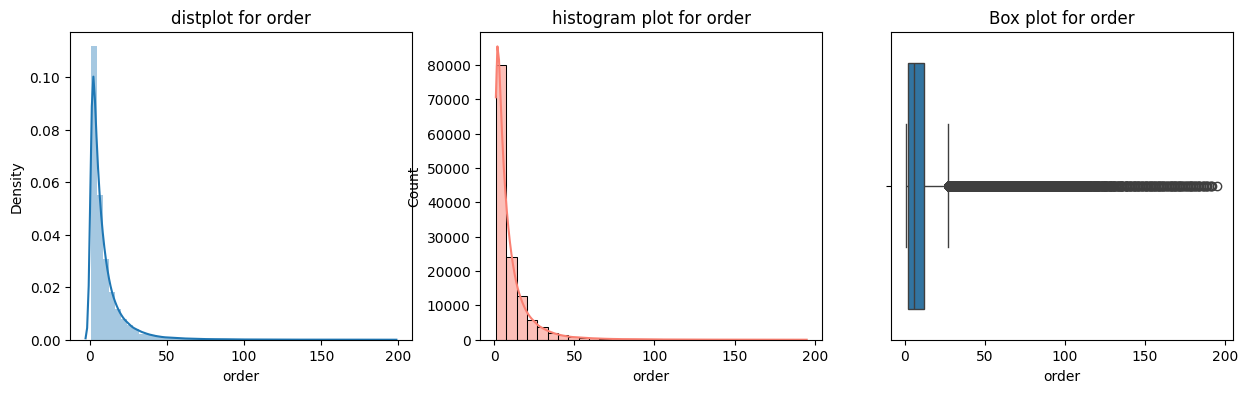

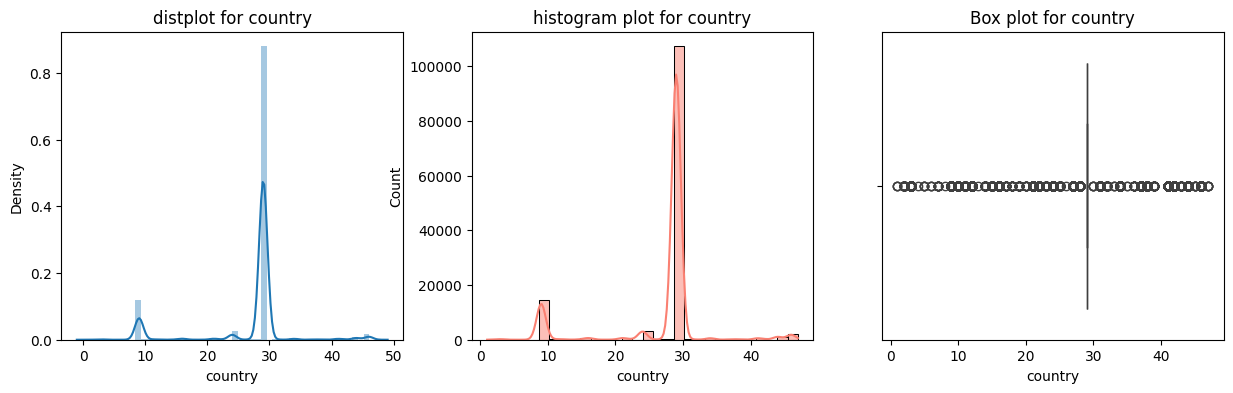

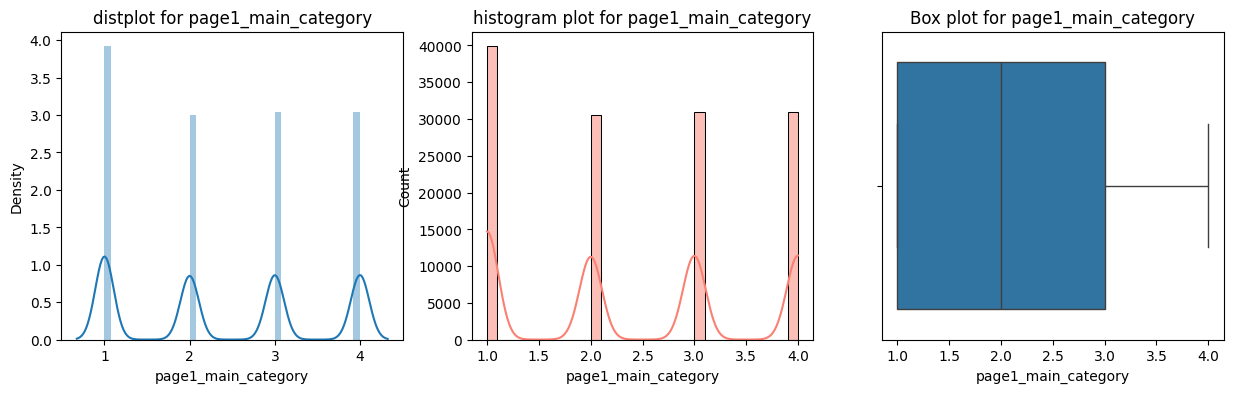

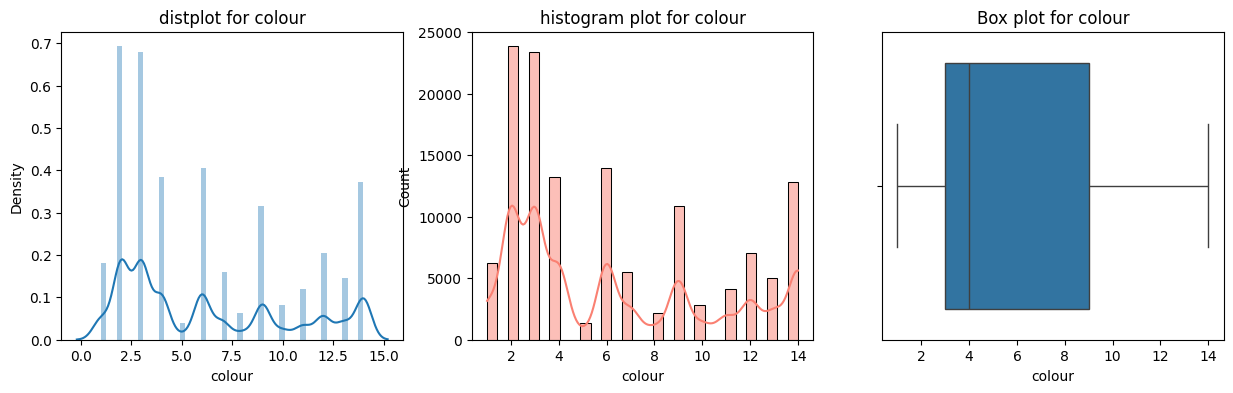

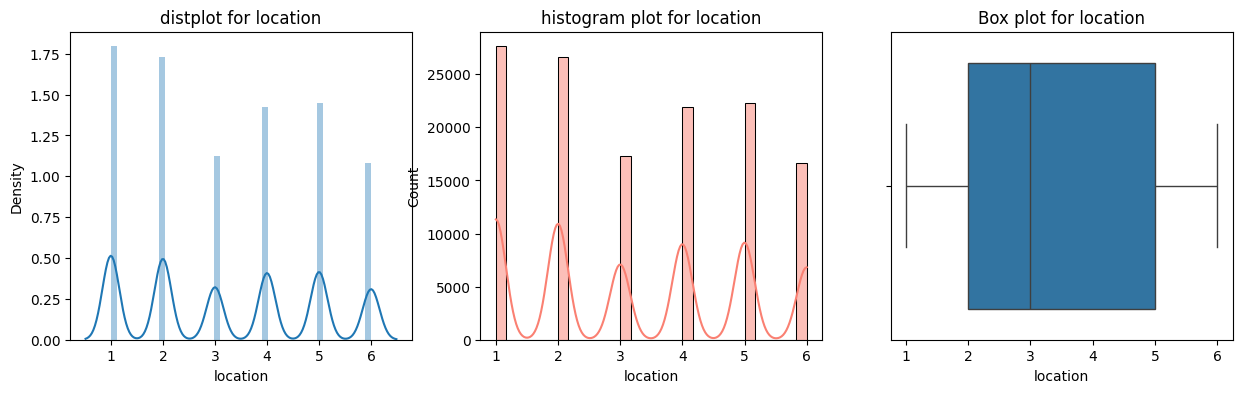

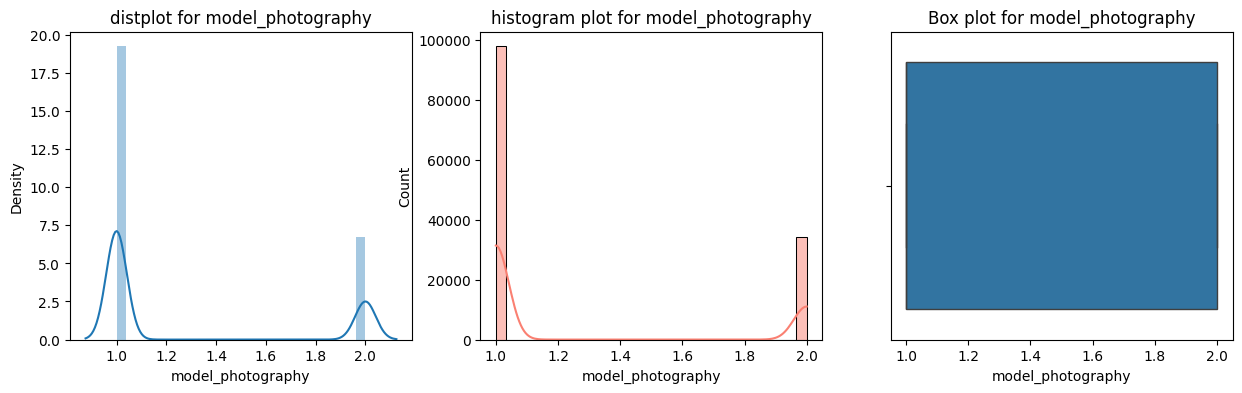

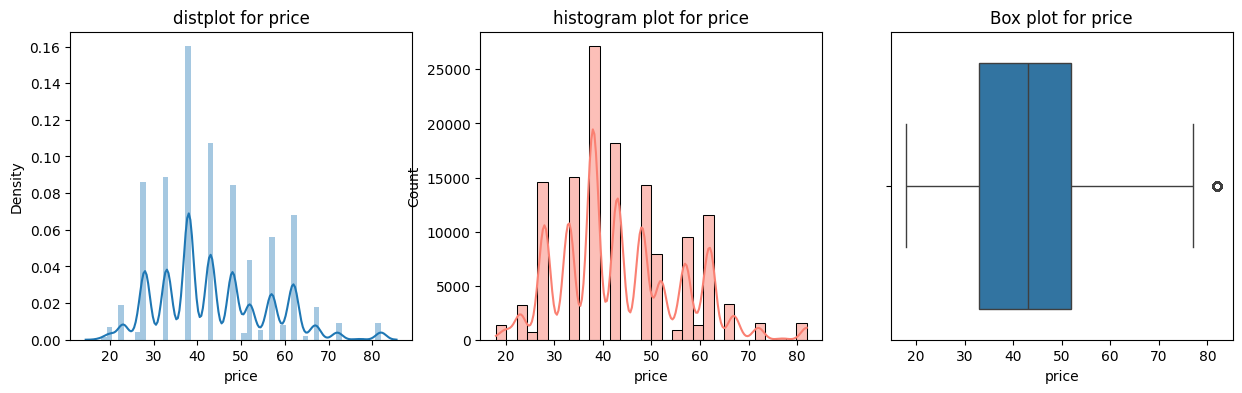

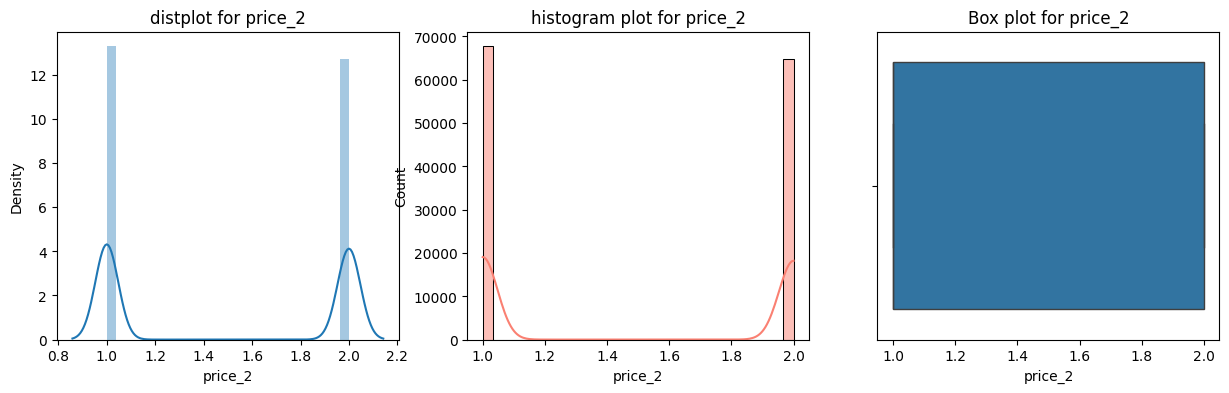

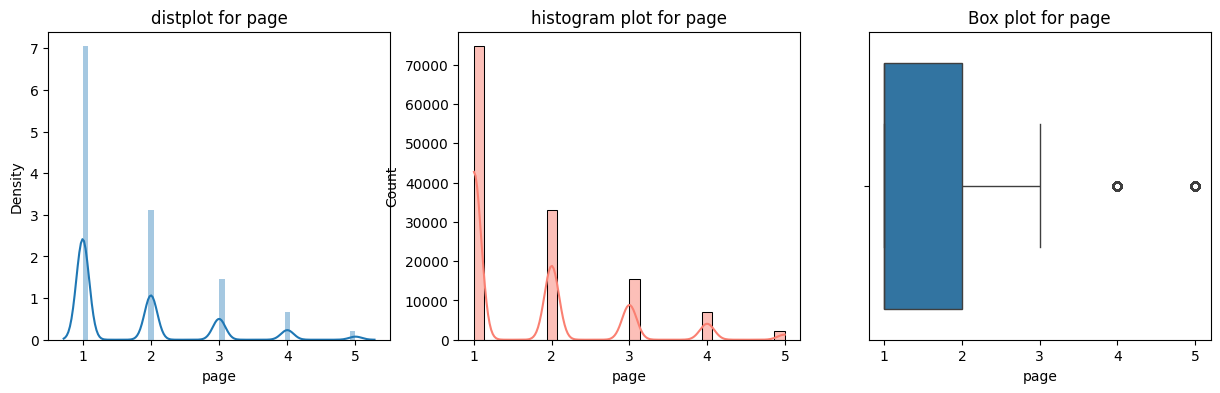

In [26]:
df_columns = df_2.columns
for i in df_columns:
  plot(df_2,i)

# **Encoding the Datas**

In [27]:
df.to_csv("train_2.csv", index = False)

In [28]:
df = pd.read_csv("/content/train_2.csv")

In [29]:
one_hot_columns = [
    'month',
    'page1_main_category',
    'colour',
    'location',
    'model_photography',
    'page',
    'continent'  # optional, useful for geographic insights
]


In [30]:
df["month"].unique()

array([6, 5, 7, 8, 4])

In [31]:
month_name = {4:"April", 5:"May", 6:"June", 7:"July", 8:"August"}

In [32]:
df["month_names"] = df["month"].map(month_name)

In [33]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent,page_1,month_names
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe,blouses,June
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe,skirts,May
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe,blouses,July
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe,skirts,May
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe,skirts,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe,sale,July
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe,blouses,June
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe,trousers,July
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe,blouses,July


In [34]:
color_map = {
    1: "beige",
    2: "black",
    3: "blue",
    4: "brown",
    5: "burgundy",
    6: "gray",
    7: "green",
    8: "navy blue",
    9: "of many colors",
    10: "olive",
    11: "pink",
    12: "red",
    13: "violet",
    14: "white"
}

In [35]:
df['color_name'] = df['colour'].map(color_map)

In [36]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent,page_1,month_names,color_name
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe,blouses,June,violet
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe,skirts,May,violet
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe,blouses,July,of many colors
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe,skirts,May,black
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe,skirts,June,of many colors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe,sale,July,black
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe,blouses,June,white
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe,trousers,July,blue
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe,blouses,July,of many colors


In [37]:
location_map = {
    1: "top left",
    2: "top in the middle",
    3: "top right",
    4: "bottom left",
    5: "bottom in the middle",
    6: "bottom right"
}

In [38]:
df['location_name'] = df['location'].map(location_map)

In [39]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent,page_1,month_names,color_name,location_name
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe,blouses,June,violet,top left
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe,skirts,May,violet,top right
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe,blouses,July,of many colors,bottom in the middle
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe,skirts,May,black,bottom left
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe,skirts,June,of many colors,bottom in the middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe,sale,July,black,top left
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe,blouses,June,white,top right
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe,trousers,July,blue,top in the middle
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe,blouses,July,of many colors,bottom in the middle


In [40]:
model_photography_map = {
    1: "en face",
    2: "profile"
}

In [41]:
df['model_pose'] = df['model_photography'].map(model_photography_map)

In [42]:
df.to_csv("train_maped.csv", index = False)

In [43]:
df = pd.read_csv("/content/train_maped.csv")

In [44]:
df

,month,day,order,country,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page,continent,page_1,month_names,color_name,location_name,model_pose
0,6,22,21,29,3,C20,13,1,2,48,1,2,Europe,blouses,June,violet,top left,profile
1,5,19,6,29,2,B26,13,3,1,57,1,2,Europe,skirts,May,violet,top right,en face
2,7,15,2,29,3,C13,9,5,1,48,1,1,Europe,blouses,July,of many colors,bottom in the middle,en face
3,5,2,2,29,2,B11,2,4,1,43,2,1,Europe,skirts,May,black,bottom left,en face
4,6,9,16,29,2,B31,9,5,1,57,1,2,Europe,skirts,June,of many colors,bottom in the middle,en face
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,4,P19,2,1,1,48,1,2,Europe,sale,July,black,top left,en face
132375,6,19,9,29,3,C26,14,3,1,28,2,2,Europe,blouses,June,white,top right,en face
132376,7,15,4,29,1,A4,3,2,2,38,2,1,Europe,trousers,July,blue,top in the middle,profile
132377,7,28,16,29,3,C50,9,5,2,20,2,3,Europe,blouses,July,of many colors,bottom in the middle,profile


In [45]:
df.drop(columns = ["page1_main_category", "colour", "location", "model_photography"], inplace = True)

In [46]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding
df['page2_clothing_model_encoded'] = label_encoder.fit_transform(df['page2_clothing_model'])

# Optionally drop the original column (if not needed anymore)
df.drop(columns=['page2_clothing_model'], inplace=True)


# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding
df['continent_encoded'] = label_encoder.fit_transform(df['continent'])

# Optionally drop the original column (if not needed anymore)
df.drop(columns=['continent'], inplace=True)

In [47]:
df

,month,day,order,country,price,price_2,page,page_1,month_names,color_name,location_name,model_pose,page2_clothing_model_encoded,continent_encoded
0,6,22,21,29,48,1,2,blouses,June,violet,top left,profile,88,2
1,5,19,6,29,57,1,2,skirts,May,violet,top right,en face,60,2
2,7,15,2,29,48,1,1,blouses,July,of many colors,bottom in the middle,en face,80,2
3,5,2,2,29,43,2,1,skirts,May,black,bottom left,en face,45,2
4,6,9,16,29,57,1,2,skirts,June,of many colors,bottom in the middle,en face,66,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,sale,July,black,top left,en face,145,2
132375,6,19,9,29,28,2,2,blouses,June,white,top right,en face,94,2
132376,7,15,4,29,38,2,1,trousers,July,blue,top in the middle,profile,33,2
132377,7,28,16,29,20,2,3,blouses,July,of many colors,bottom in the middle,profile,121,2


In [48]:
from sklearn.preprocessing import LabelBinarizer
labelbinarizer = LabelBinarizer()

encoded_results_2 = labelbinarizer.fit_transform(df["page_1"])
df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

encoded_results_3 = labelbinarizer.fit_transform(df["month_names"])
df_encoded_3 = pd.DataFrame(encoded_results_3,columns=labelbinarizer.classes_)

encoded_results_4 = labelbinarizer.fit_transform(df["color_name"])
df_encoded_4 = pd.DataFrame(encoded_results_4,columns=labelbinarizer.classes_)

encoded_results_5 = labelbinarizer.fit_transform(df["location_name"])
df_encoded_5 = pd.DataFrame(encoded_results_5,columns=labelbinarizer.classes_)

In [49]:
df = pd.concat([df, df_encoded_2, df_encoded_3, df_encoded_4, df_encoded_5], axis=1)

In [50]:
df.columns.size

43

In [51]:
pd.set_option("display.max_columns", None)

In [52]:
df

,month,day,order,country,price,price_2,page,page_1,month_names,color_name,location_name,model_pose,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right
0,6,22,21,29,48,1,2,blouses,June,violet,top left,profile,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5,19,6,29,57,1,2,skirts,May,violet,top right,en face,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,7,15,2,29,48,1,1,blouses,July,of many colors,bottom in the middle,en face,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,5,2,2,29,43,2,1,skirts,May,black,bottom left,en face,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6,9,16,29,57,1,2,skirts,June,of many colors,bottom in the middle,en face,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,sale,July,black,top left,en face,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
132375,6,19,9,29,28,2,2,blouses,June,white,top right,en face,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
132376,7,15,4,29,38,2,1,trousers,July,blue,top in the middle,profile,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132377,7,28,16,29,20,2,3,blouses,July,of many colors,bottom in the middle,profile,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [53]:
df.columns

Index(['month', 'day', 'order', 'country', 'price', 'price_2', 'page',
       'page_1', 'month_names', 'color_name', 'location_name', 'model_pose',
       'page2_clothing_model_encoded', 'continent_encoded', 'blouses', 'sale',
       'skirts', 'trousers', 'April', 'August', 'July', 'June', 'May', 'beige',
       'black', 'blue', 'brown', 'burgundy', 'gray', 'green', 'navy blue',
       'of many colors', 'olive', 'pink', 'red', 'violet', 'white',
       'bottom in the middle', 'bottom left', 'bottom right',
       'top in the middle', 'top left', 'top right'],
      dtype='object')

# **Correlation**

In [54]:
df.to_csv("train_data_for_model.csv", index = False)

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder

In [56]:
df = pd.read_csv("/content/train_data_for_model.csv")

In [57]:
df

,month,day,order,country,price,price_2,page,page_1,month_names,color_name,location_name,model_pose,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right
0,6,22,21,29,48,1,2,blouses,June,violet,top left,profile,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,5,19,6,29,57,1,2,skirts,May,violet,top right,en face,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,7,15,2,29,48,1,1,blouses,July,of many colors,bottom in the middle,en face,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,5,2,2,29,43,2,1,skirts,May,black,bottom left,en face,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6,9,16,29,57,1,2,skirts,June,of many colors,bottom in the middle,en face,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,sale,July,black,top left,en face,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
132375,6,19,9,29,28,2,2,blouses,June,white,top right,en face,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
132376,7,15,4,29,38,2,1,trousers,July,blue,top in the middle,profile,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132377,7,28,16,29,20,2,3,blouses,July,of many colors,bottom in the middle,profile,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [58]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Apply label encoding
df['model_pose_encoded'] = label_encoder.fit_transform(df['model_pose'])

# Optionally drop the original column (if not needed anymore)
df.drop(columns=['model_pose'], inplace=True)

In [59]:
df

,month,day,order,country,price,price_2,page,page_1,month_names,color_name,location_name,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right,model_pose_encoded
0,6,22,21,29,48,1,2,blouses,June,violet,top left,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,5,19,6,29,57,1,2,skirts,May,violet,top right,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,15,2,29,48,1,1,blouses,July,of many colors,bottom in the middle,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,5,2,2,29,43,2,1,skirts,May,black,bottom left,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6,9,16,29,57,1,2,skirts,June,of many colors,bottom in the middle,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,sale,July,black,top left,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132375,6,19,9,29,28,2,2,blouses,June,white,top right,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
132376,7,15,4,29,38,2,1,trousers,July,blue,top in the middle,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
132377,7,28,16,29,20,2,3,blouses,July,of many colors,bottom in the middle,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [60]:
df.drop(columns = ["page_1","month_names","color_name","location_name"], inplace = True)

In [61]:
df.columns.size

39

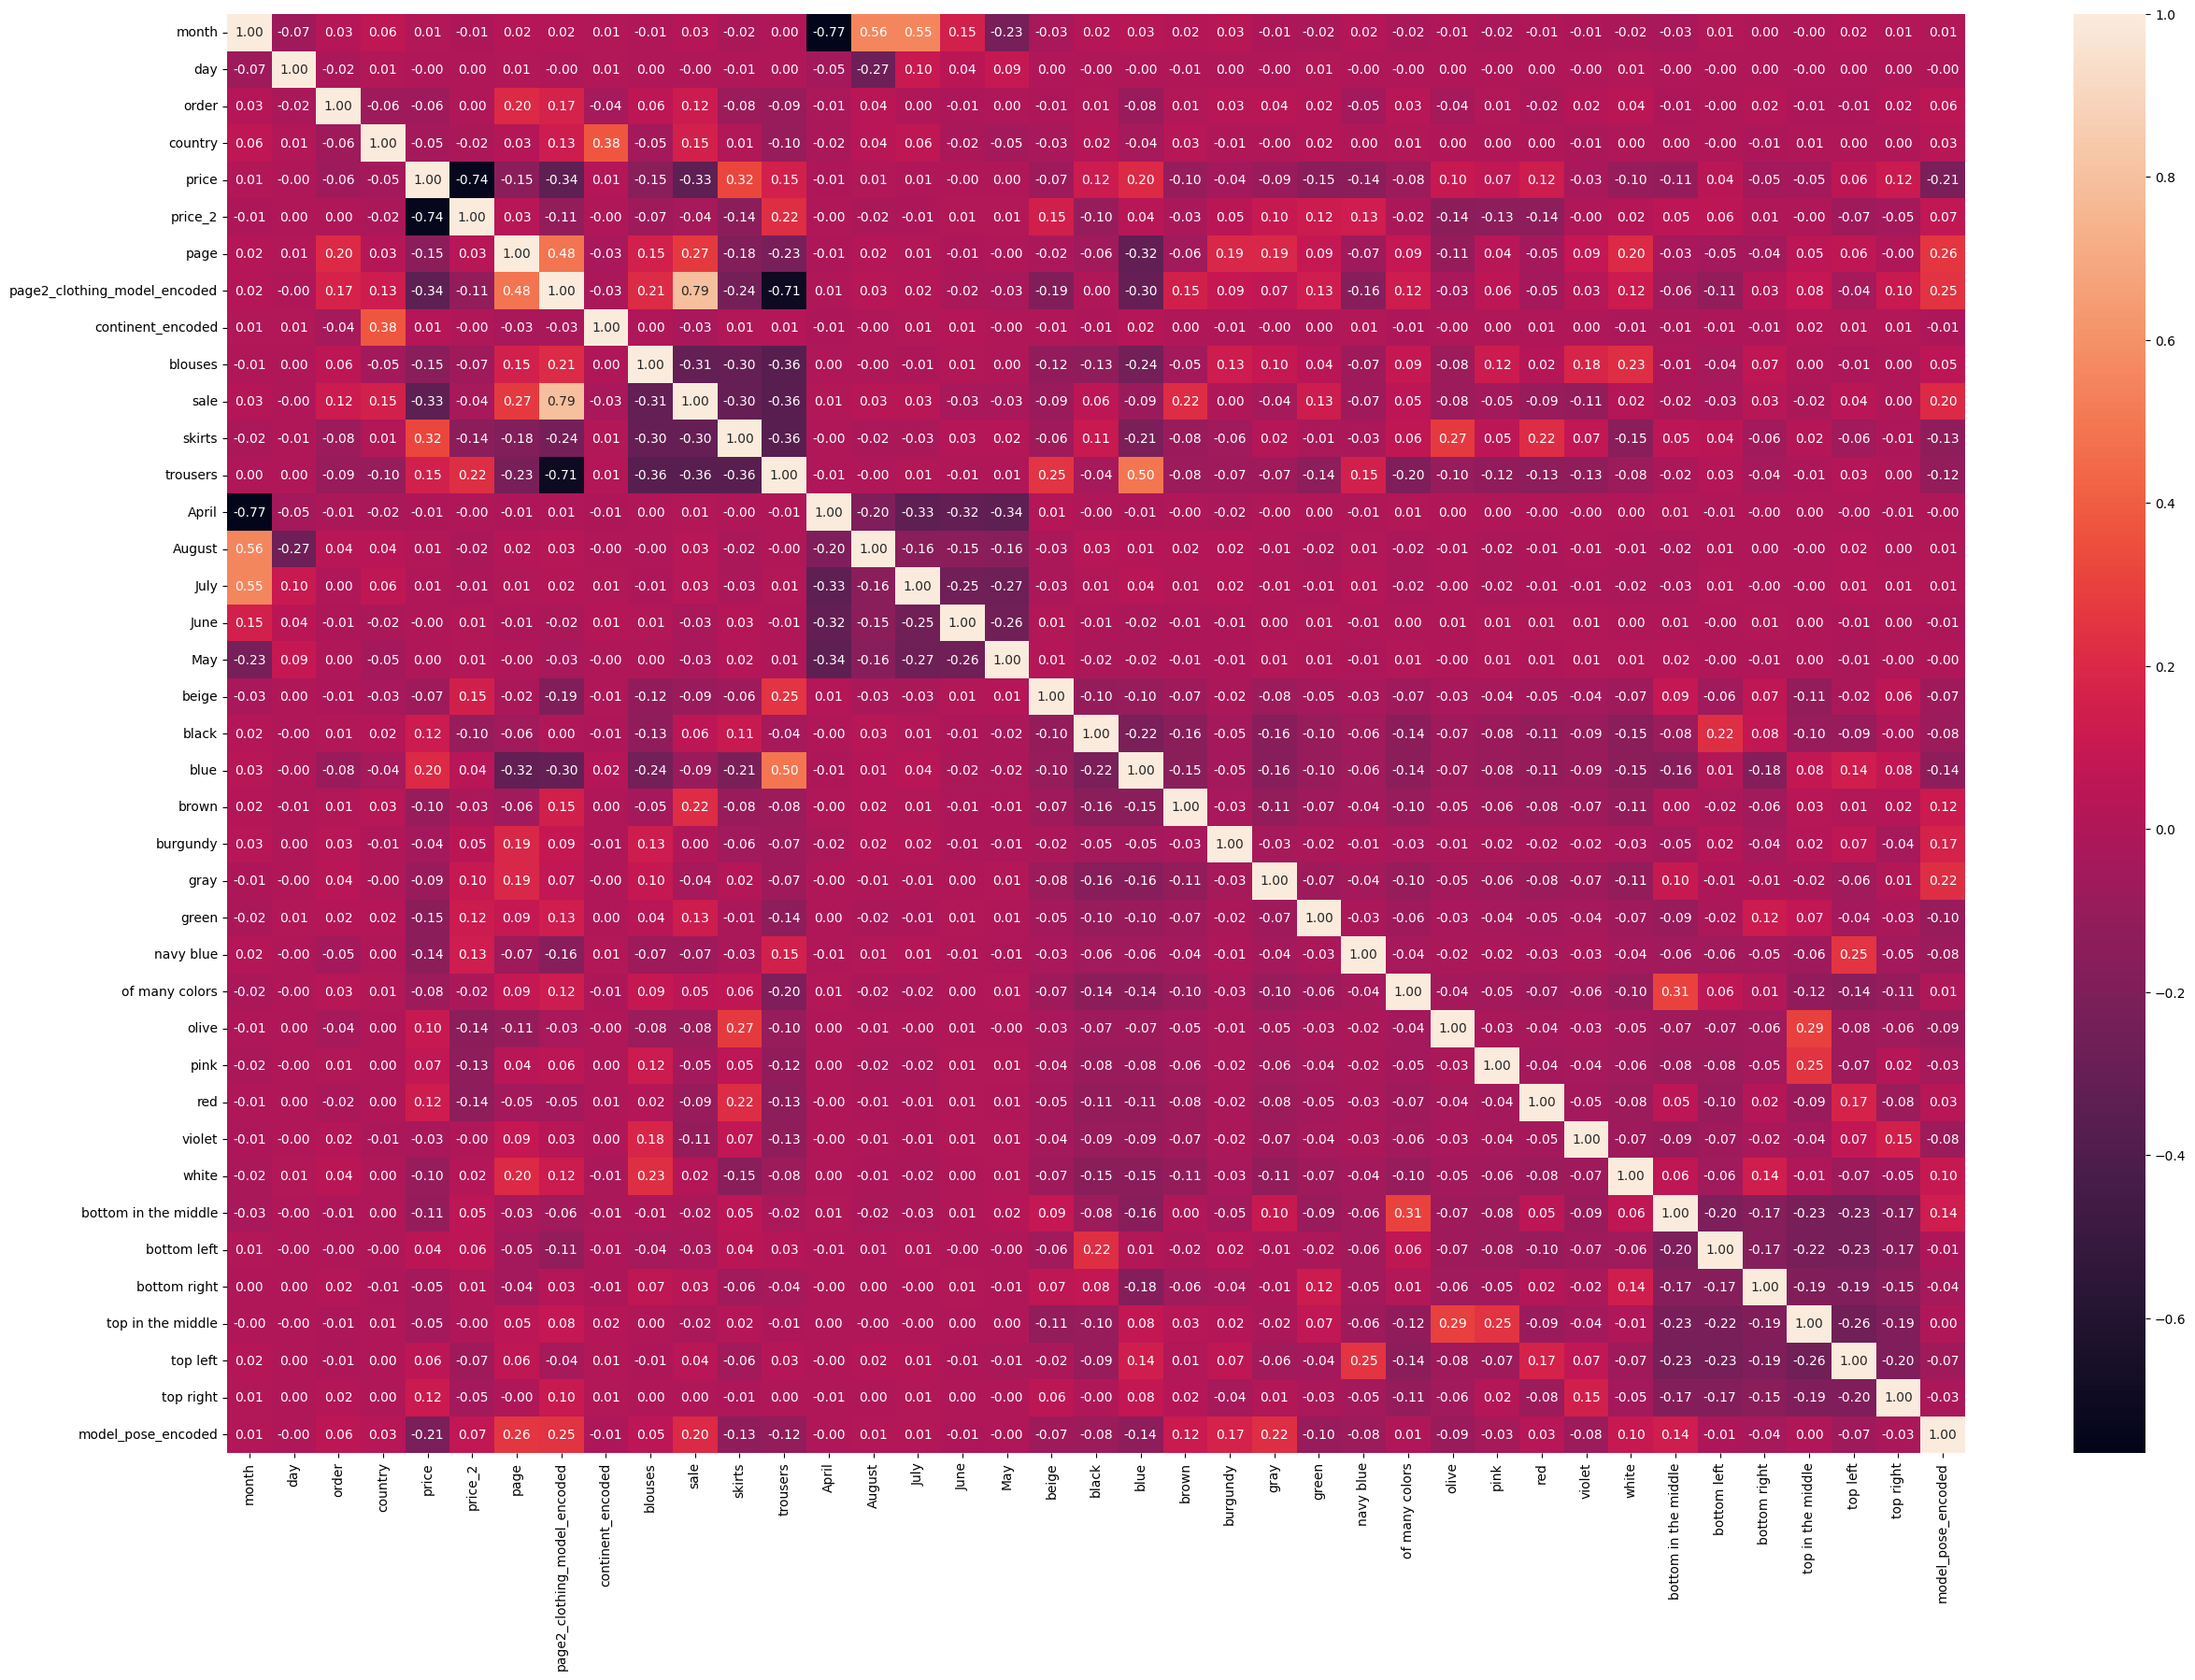

In [62]:
df_corr= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(df_corr,annot= True, fmt=".2f")
plt.show()

# **Model Selection for Regression**

In [63]:
df

,month,day,order,country,price,price_2,page,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right,model_pose_encoded
0,6,22,21,29,48,1,2,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,5,19,6,29,57,1,2,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,15,2,29,48,1,1,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,5,2,2,29,43,2,1,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6,9,16,29,57,1,2,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132375,6,19,9,29,28,2,2,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
132376,7,15,4,29,38,2,1,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
132377,7,28,16,29,20,2,3,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [64]:
# now we want to create the model for "resale_price" prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [65]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["price"])
    y= df["price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [66]:
df

,month,day,order,country,price,price_2,page,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right,model_pose_encoded
0,6,22,21,29,48,1,2,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,5,19,6,29,57,1,2,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,15,2,29,48,1,1,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,5,2,2,29,43,2,1,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6,9,16,29,57,1,2,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132375,6,19,9,29,28,2,2,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
132376,7,15,4,29,38,2,1,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
132377,7,28,16,29,20,2,3,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [67]:
df.columns.size

39

In [68]:
select_model(df, LinearRegression)
select_model(df, DecisionTreeRegressor)
select_model(df, RandomForestRegressor)
select_model(df, AdaBoostRegressor)
select_model(df, ExtraTreesRegressor)
select_model(df, GradientBoostingRegressor)
select_model(df, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.8458254834418619, 'Mean_squared_error': 24.192604140352998, 'Root_mean_squared_error': np.float64(4.9185977819245394), 'Mean_absolute_error': 3.694654787326056}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.8472993840048086, 'Mean_squared_error': 24.204142526452998, 'Root_mean_squared_error': np.float64(4.919770576607511), 'Mean_absolute_error': 3.680177157965202}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 1.0, 'Mean_squared_error': 0.0, 'Root_mean_squared_error': np.float64(0.0), 'Mean_absolute_error': 0.0}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 1.0, 'Mean_squared_error': 0.0, 'Root_mean_squared_error': np.float64(0.0), 'Mean_absolute_error': 0.0}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.999999329172463, 'Mean_squared_error': 0.00010526425124878424, 'Root_mean_squared_error': np.float64(0.01025983680419841), 'Mean_absolu

In [69]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df.drop(columns=["price"])
y= df["price"]

model_1= RandomForestRegressor().fit(x,y)

# y_pred= model_1.predict(X_test)

# test_mse= mean_squared_error(y_test, y_pred)
# test_rmse= np.sqrt(test_mse)
# test_mae= mean_absolute_error(y_test, y_pred)
# test_r2= r2_score(y_test, y_pred)

# metrics_test={"Data": "Test Data",
#         "Name":RandomForestRegressor.__name__,
#         "R2_score":test_r2,
#         "Mean_squared_error":test_mse,
#         "Root_mean_squared_error":test_rmse,
#         "Mean_absolute_error":test_mae
#             }

# print(metrics_test)

In [70]:
# Saving the Model unsing pickle
with open("Click_Stream_Data_Regression.pkl","wb") as f:
  pickle.dump(model_1,f)

In [71]:
print(df.columns.size)
print(df.columns)
def preprocess_test_data(df):
    # Drop irrelevant columns
    df = df.drop(columns=['year', 'session_id'])

    # Define the mapping from country codes to continent names
    continent_map = {
        1: "Oceania", 2: "Europe", 3: "Europe", 4: "Europe", 5: "Caribbean",
        6: "Oceania", 7: "Europe", 8: "Europe", 9: "Europe", 10: "Europe",
        11: "Europe", 12: "Unknown", 13: "Europe", 14: "Europe", 15: "Europe",
        16: "Europe", 17: "Europe", 18: "Europe", 19: "Europe", 20: "Asia",
        21: "Europe", 22: "Europe", 23: "Europe", 24: "Europe", 25: "Europe",
        26: "North America", 27: "Europe", 28: "Europe", 29: "Europe", 30: "Europe",
        31: "Europe", 32: "Europe", 33: "Europe", 34: "Europe", 35: "Europe",
        36: "Europe", 37: "Europe", 38: "Europe", 39: "Europe", 40: "Asia",
        41: "Europe", 42: "North America", 43: "Unknown", 44: "Unknown",
        45: "Unknown", 46: "Unknown", 47: "Unknown"
    }

    # Map the country codes to continents
    df['continent'] = df['country'].map(continent_map).fillna('Unknown')

    # Define mapping dictionary
    category_map = {
        1: 'trousers',
        2: 'skirts',
        3: 'blouses',
        4: 'sale'
    }

    # Create new column using the mapping
    df['page_1'] = df['page1_main_category'].map(category_map)

    month_name = {4:"April", 5:"May", 6:"June", 7:"July", 8:"August"}
    df["month_names"] = df["month"].map(month_name)

    color_map = {
                    1: "beige",
                    2: "black",
                    3: "blue",
                    4: "brown",
                    5: "burgundy",
                    6: "gray",
                    7: "green",
                    8: "navy blue",
                    9: "of many colors",
                    10: "olive",
                    11: "pink",
                    12: "red",
                    13: "violet",
                    14: "white"
                }

    df['color_name'] = df['colour'].map(color_map)

    location_map = {
                    1: "top left",
                    2: "top in the middle",
                    3: "top right",
                    4: "bottom left",
                    5: "bottom in the middle",
                    6: "bottom right"
                }

    df['location_name'] = df['location'].map(location_map)

    model_photography_map = {
                                1: "en face",
                                2: "profile"
                            }

    df['model_pose'] = df['model_photography'].map(model_photography_map)

    df.drop(columns = ["page1_main_category", "colour", "location", "model_photography"], inplace = True)

    # Initialize the encoder
    label_encoder = LabelEncoder()

    # Apply label encoding
    df['page2_clothing_model_encoded'] = label_encoder.fit_transform(df['page2_clothing_model'])

    # Optionally drop the original column (if not needed anymore)
    df.drop(columns=['page2_clothing_model'], inplace=True)

    # Initialize the encoder
    label_encoder = LabelEncoder()

    # Apply label encoding
    df['continent_encoded'] = label_encoder.fit_transform(df['continent'])

    # Optionally drop the original column (if not needed anymore)
    df.drop(columns=['continent'], inplace=True)

    encoded_results_2 = labelbinarizer.fit_transform(df["page_1"])
    df_encoded_2 = pd.DataFrame(encoded_results_2,columns=labelbinarizer.classes_)

    encoded_results_3 = labelbinarizer.fit_transform(df["month_names"])
    df_encoded_3 = pd.DataFrame(encoded_results_3,columns=labelbinarizer.classes_)

    encoded_results_4 = labelbinarizer.fit_transform(df["color_name"])
    df_encoded_4 = pd.DataFrame(encoded_results_4,columns=labelbinarizer.classes_)

    encoded_results_5 = labelbinarizer.fit_transform(df["location_name"])
    df_encoded_5 = pd.DataFrame(encoded_results_5,columns=labelbinarizer.classes_)

    df = pd.concat([df,df_encoded_2, df_encoded_3, df_encoded_4, df_encoded_5], axis=1)

    # Initialize the encoder
    label_encoder = LabelEncoder()

    # Apply label encoding
    df['model_pose_encoded'] = label_encoder.fit_transform(df['model_pose'])

    # Optionally drop the original column (if not needed anymore)
    df.drop(columns=['model_pose'], inplace=True)

    df.drop(columns = ["page_1","month_names","color_name","location_name"], inplace = True)

    print(df.columns)
    print(df.columns.size)
    return df

39
Index(['month', 'day', 'order', 'country', 'price', 'price_2', 'page',
       'page2_clothing_model_encoded', 'continent_encoded', 'blouses', 'sale',
       'skirts', 'trousers', 'April', 'August', 'July', 'June', 'May', 'beige',
       'black', 'blue', 'brown', 'burgundy', 'gray', 'green', 'navy blue',
       'of many colors', 'olive', 'pink', 'red', 'violet', 'white',
       'bottom in the middle', 'bottom left', 'bottom right',
       'top in the middle', 'top left', 'top right', 'model_pose_encoded'],
      dtype='object')


In [72]:
df_test = pd.read_csv("/content/drive/MyDrive/Clickstream-customer conversion/test_data.csv")
pre_processed_data = preprocess_test_data(df_test)

Index(['month', 'day', 'order', 'country', 'price', 'price_2', 'page',
       'page2_clothing_model_encoded', 'continent_encoded', 'blouses', 'sale',
       'skirts', 'trousers', 'April', 'August', 'July', 'June', 'May', 'beige',
       'black', 'blue', 'brown', 'burgundy', 'gray', 'green', 'navy blue',
       'of many colors', 'olive', 'pink', 'red', 'violet', 'white',
       'bottom in the middle', 'bottom left', 'bottom right',
       'top in the middle', 'top left', 'top right', 'model_pose_encoded'],
      dtype='object')
39


In [73]:
# Loading the Model..

with open("/content/Click_Stream_Data_Regression.pkl", "rb") as loaded_file:
    model_regression = pickle.load(loaded_file)

In [74]:
x_test = pre_processed_data.drop("price", axis = 1)
y_test = pre_processed_data["price"]
y_pred = model_regression.predict(x_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

metrics_test

{'Data': 'Test Data',
 'Name': 'RandomForestRegressor',
 'R2_score': 0.9988646241111651,
 'Mean_squared_error': 0.17976258347182353,
 'Root_mean_squared_error': np.float64(0.42398417832723845),
 'Mean_absolute_error': 0.04841244901042454}

# **Classification Method - Predict (purchased/not purchased)**

In [75]:
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [76]:
df["price_2"].unique()

array([1, 2])

In [77]:
df["price_2"] = df["price_2"].replace({2:0})

In [78]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["price_2"])
    y= df["price_2"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)

    #checking the accuracy_score
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_test= accuracy_score(y_test, y_pred_test)

    metrics={"Algorithm": algorithm.__name__,
            "Accuracy_Train": accuracy_train,
            "Accuracy_Test": accuracy_test}
    print(metrics)
    print("")

In [79]:
select_model(df,DecisionTreeClassifier)
select_model(df,RandomForestClassifier)
select_model(df,ExtraTreesClassifier)
select_model(df,AdaBoostClassifier)
select_model(df,GradientBoostingClassifier)
select_model(df,XGBClassifier)

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}

{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}

{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}

{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}

{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}

{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 1.0}



In [80]:
df

,month,day,order,country,price,price_2,page,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right,model_pose_encoded
0,6,22,21,29,48,1,2,88,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
1,5,19,6,29,57,1,2,60,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,15,2,29,48,1,1,80,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,5,2,2,29,43,0,1,45,2,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,6,9,16,29,57,1,2,66,2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132374,7,4,3,29,48,1,2,145,2,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
132375,6,19,9,29,28,0,2,94,2,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
132376,7,15,4,29,38,0,1,33,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
132377,7,28,16,29,20,0,3,121,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1


In [81]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV
# x, y spliting
x= df.drop(columns=["price_2"])
y= df["price_2"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [82]:
gridsearch.best_params_

{'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [83]:
gridsearch.best_score_

np.float64(1.0)

In [84]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df.drop(columns=["price_2"])
y= df["price_2"]

model_2= RandomForestClassifier().fit(x,y)

# y_pred= model_1.predict(X_test)

# test_mse= mean_squared_error(y_test, y_pred)
# test_rmse= np.sqrt(test_mse)
# test_mae= mean_absolute_error(y_test, y_pred)
# test_r2= r2_score(y_test, y_pred)

# metrics_test={"Data": "Test Data",
#         "Name":RandomForestRegressor.__name__,
#         "R2_score":test_r2,
#         "Mean_squared_error":test_mse,
#         "Root_mean_squared_error":test_rmse,
#         "Mean_absolute_error":test_mae
#             }

# print(metrics_test)

In [85]:
# Saving the Model unsing pickle
with open("Click_Stream_Data_Classification.pkl","wb") as f:
    pickle.dump(model_2,f)

In [87]:
# Loading the Model..

with open("/content/Click_Stream_Data_Classification.pkl", "rb") as loaded_file:
    model_classification = pickle.load(loaded_file)

In [93]:
pre_processed_data["price_2"] = pre_processed_data["price_2"].replace({2:0})
x_test = pre_processed_data.drop("price_2", axis = 1)
y_test = pre_processed_data["price_2"]
y_pred = model_classification.predict(x_test)

accuracy= accuracy_score(y_test, y_pred)
print("Accurary_score:",accuracy)
cm = confusion_matrix(y_test, y_pred)
cm

Accurary_score: 1.0


array([[16114,     0],
       [    0, 16981]])

# **Clustering Models**

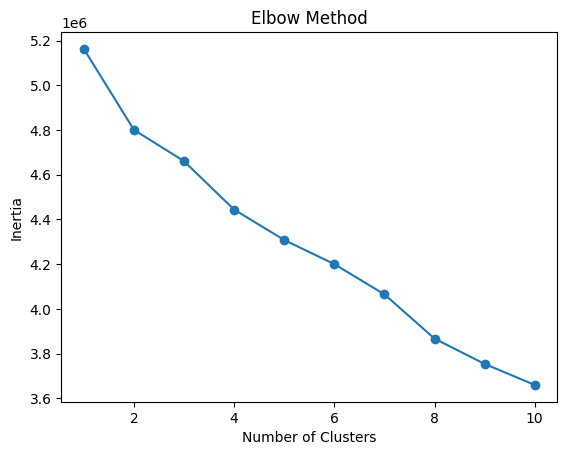

In [94]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

inertia = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [95]:
# The sharpest drop is from k=1 to k=3
# After k=4, the improvement becomes more gradual

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

df['Segment'] = clusters

In [101]:
segment_analysis = df.groupby('Segment').mean()
segment_analysis

,month,day,order,country,price,price_2,page,page2_clothing_model_encoded,continent_encoded,blouses,sale,skirts,trousers,April,August,July,June,May,beige,black,blue,brown,burgundy,gray,green,navy blue,of many colors,olive,pink,red,violet,white,bottom in the middle,bottom left,bottom right,top in the middle,top left,top right,model_pose_encoded
Segment,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5.457152,14.438823,9.062383,26.612734,40.327831,0.356825,1.607696,61.321453,2.064687,0.295836,0.051610,0.35302,0.299534,0.303071,0.064259,0.180663,0.206120,0.245887,0.104829,0.091913,0.000000,0.037033,0.00000,0.185701,0.000000,0.000000,0.348304,0.000000,0.000000,0.096361,0.000000,0.135859,0.953374,0.046626,0.000000,0.000000,0.000000,0.000000,0.366204
1,5.664811,14.456529,12.925510,28.825890,36.303655,0.533207,2.251335,165.976961,2.050582,0.033625,0.966311,0.00000,0.000064,0.295933,0.105058,0.236244,0.173081,0.189684,0.013450,0.222505,0.117060,0.218643,0.04331,0.083242,0.086782,0.000000,0.078094,0.000000,0.016539,0.014995,0.000032,0.105348,0.120889,0.143799,0.145408,0.201332,0.257417,0.131154,0.452346
2,5.546357,14.524761,9.475177,26.692648,46.960490,0.661599,1.651235,81.685429,2.086612,0.503620,0.000000,0.49638,0.000000,0.292706,0.078731,0.197861,0.207149,0.223553,0.014232,0.195524,0.025175,0.066443,0.00000,0.126391,0.057445,0.006454,0.040110,0.058417,0.075442,0.093438,0.104402,0.136527,0.000000,0.193807,0.162881,0.259402,0.220016,0.163895,0.194200
3,5.628047,14.567376,7.870816,25.795073,47.981079,0.364490,1.366239,19.902653,2.091020,0.000000,0.000000,0.00000,1.000000,0.281691,0.088834,0.226064,0.191108,0.212303,0.093411,0.167872,0.540087,0.072536,0.00000,0.052595,0.000000,0.053469,0.000000,0.000000,0.000000,0.008776,0.000000,0.011254,0.021720,0.210729,0.123732,0.227784,0.262128,0.153907,0.120787


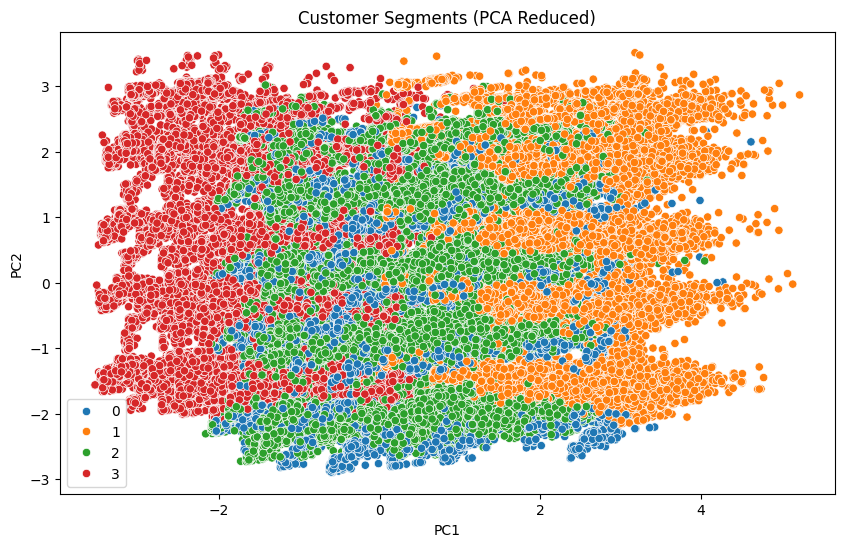

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(df_scaled)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced[:, 0], y=reduced[:, 1], hue=clusters, palette='tab10')
plt.title("Customer Segments (PCA Reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
